# **Exploratory Data Analysis Working Examples**

EDA stands for exploratory data analysis, and it is an essential step in machine learning (ML) and data analysis. EDA involves examining and visualizing the dataset to gain a better understanding of the data and to identify patterns, trends, and relationships between the variables.

# **ABSTRACT:**

The data used in this project is the famous Titanic dataset, which contains information about the passengers who were aboard the Titanic when it sank in 1912. The goal of this project is to predict whether a passenger survived or not based on various features such as age, gender, ticket class, and more.

The dataset has a total of 891 rows, each representing a passenger, and 12 columns of different features such as:

PassengerId: The ID assigned to each passenger.     
Survived: Whether the passenger survived or not (0 = No, 1 = Yes).    
Pclass: The passenger's class of travel (1st, 2nd, or 3rd class).   
Name: The passenger's name.   
Sex: The passenger's gender.    
Age: The passenger's age.    
SibSp: The number of siblings/spouses the passenger had aboard the Titanic.   
Parch: The number of parents/children the passenger had aboard the Titanic.    
Ticket: The ticket number assigned to the passenger.   
Fare: The price of the ticket.   
Cabin: The cabin number assigned to the passenger.   
Embarked: The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).   

Another dataset Used is:

The company aims to hire employees who have successfully completed its training courses. It wants to identify whether these candidates are genuinely interested in working for the company or seeking new employment opportunities. This information is necessary to reduce the cost, time, and improve the quality of the training courses and categorization of candidates. Data such as demographics, education, and experience is available from the candidate's signup and enrollment.

This data is also useful for HR research to understand what causes people to leave their current job. The data will be used to predict the probability of a candidate looking for a new job or working for the company, and also to determine the factors that influence the candidate's decision.

The dataset includes the below features:

enrollee_id : Unique ID for candidate

city: City code

city_ development _index : Developement index of the city (scaled)

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

last_new_job: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change

Contents of the Notebook:    



Part1: Exploratory Data Analysis(EDA):

1)Analysis of the features.

2)Finding any relations or trends considering multiple features.

Part2: Feature Engineering and Data Cleaning:      


1)Adding any few features.

2)Removing redundant features.

3)Converting features into suitable form for modeling.

Part3: Predictive Modeling


1)Running Basic Algorithms.

2)Cross Validation.

3)Ensembling.

4)Important Features Extraction.

# **Installation of dependent libraries required**

In [ ]:
#installing dependencies
!pip install eli5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
import missingno
from sklearn.linear_model import LogisticRegression
from seaborn import load_dataset
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Import Data from CSV Files & Display the contents**

In [ ]:
#Reading the titanic dataset
url = r'https://github.com/jeelkan/Exploratory-Data-Analysis/blob/main/titanic_train.csv?raw=true'
df_titanic = pd.read_csv(url,index_col=0)

In [ ]:
#Reading the job dataset
url = r'https://github.com/jeelkan/Exploratory-Data-Analysis/blob/main/aug_train.csv?raw=true'
df_job = pd.read_csv(url,index_col=0)

In [ ]:
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_job.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,,,
8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
# Displaying info regarding the columns and datatypes

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
# Displaying info regarding the columns and datatypes

df_job.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 8949 to 23834
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 2.0+ MB


In [ ]:
# Checking if there are null values in the dataframe

df_titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# Checking if there are null values in the dataframe

df_job.isnull().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

We can see that some of the categorical data is missing from both the dataset. Hence we need to fill the missing data by using an imputation method.

In [ ]:
# Displaying column names having null values

null_values_col_titanic = df_titanic.columns[df_titanic.isna().any()].tolist()
null_values_col_titanic

['Age', 'Cabin', 'Embarked']

In [ ]:
# Displaying column names having null values

null_values_col_job = df_job.columns[df_job.isna().any()].tolist()
null_values_col_job

['gender',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

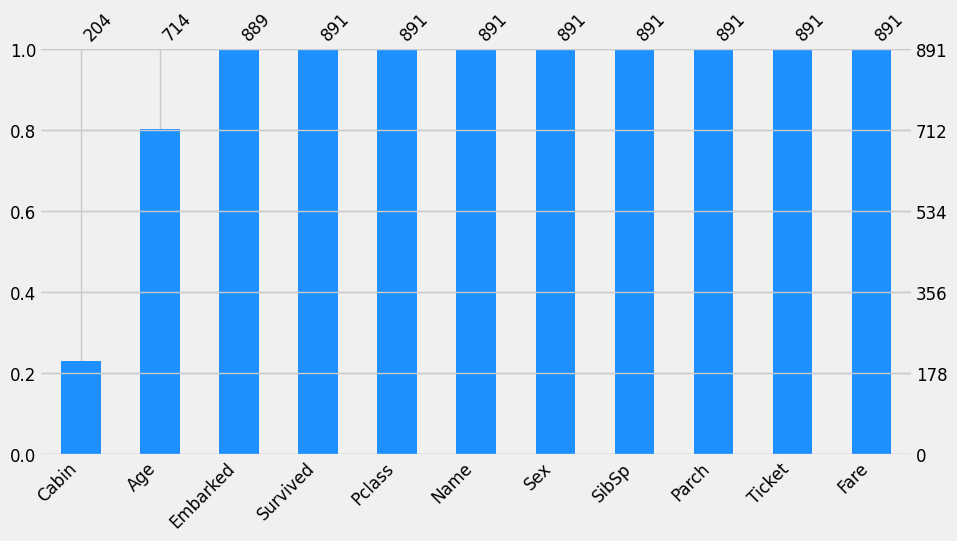

In [ ]:
# Checking the missing values for columns using bar plot

missingno.bar(df_titanic,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

Here in above graph cabin and age have missing values which is clearly shown.

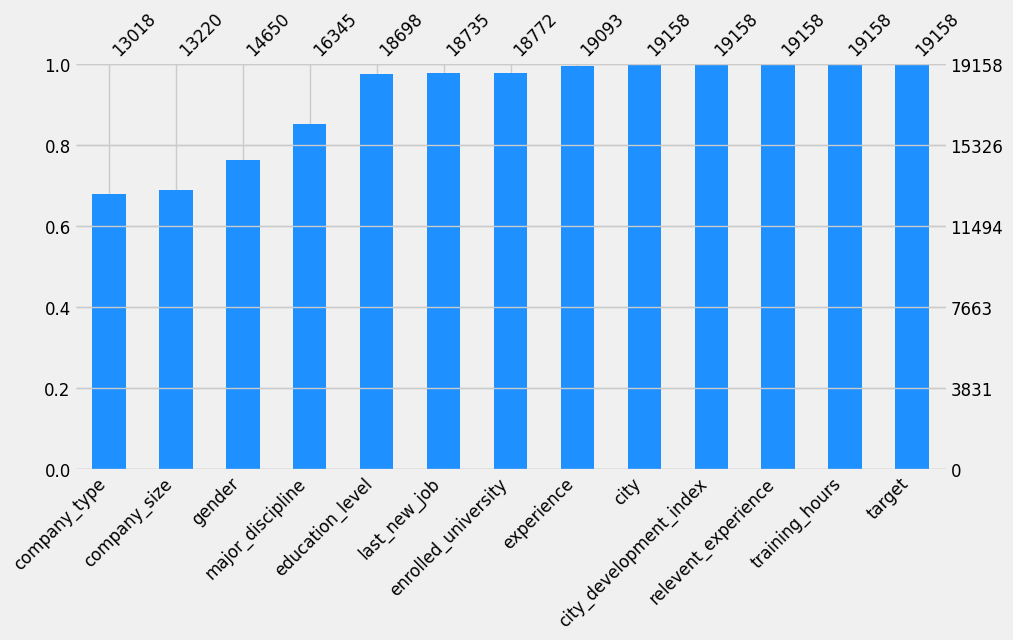

In [ ]:
# Checking the missing values for columns using bar plot

missingno.bar(df_job,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

Here in above graph company_type, company_size, gender and major_discipline have missing values which is shown. So using mode imputation mwthod filiing out the null values for smooth processing.

# **Mode Imputation Method**

In [ ]:
# Using mode method to impute categorical data

df_titanic['Age'].fillna(df_titanic['Age'].mode()[0], inplace=True)
df_titanic['Cabin'].fillna(df_titanic['Cabin'].mode()[0], inplace=True)
df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0], inplace=True)

In [ ]:
# Using mode method to impute categorical data

df_job['gender'].fillna(df_job['gender'].mode()[0], inplace=True)
df_job['enrolled_university'].fillna(df_job['enrolled_university'].mode()[0], inplace=True)
df_job['education_level'].fillna(df_job['education_level'].mode()[0], inplace=True)
df_job['major_discipline'].fillna(df_job['major_discipline'].mode()[0], inplace=True)
df_job['experience'].fillna(df_job['experience'].mode()[0], inplace=True)
df_job['company_size'].fillna(df_job['company_size'].mode()[0], inplace=True)
df_job['company_type'].fillna(df_job['company_type'].mode()[0], inplace=True)
df_job['last_new_job'].fillna(df_job['last_new_job'].mode()[0], inplace=True)

For imputing the data, mode imputation method has been used since the missing data belongs to categorical type.

In [ ]:
# Checking if there are any null values left in any column after imputation

df_titanic.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [ ]:
# Checking if there are any null values left in any column after imputation

df_job.isnull().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

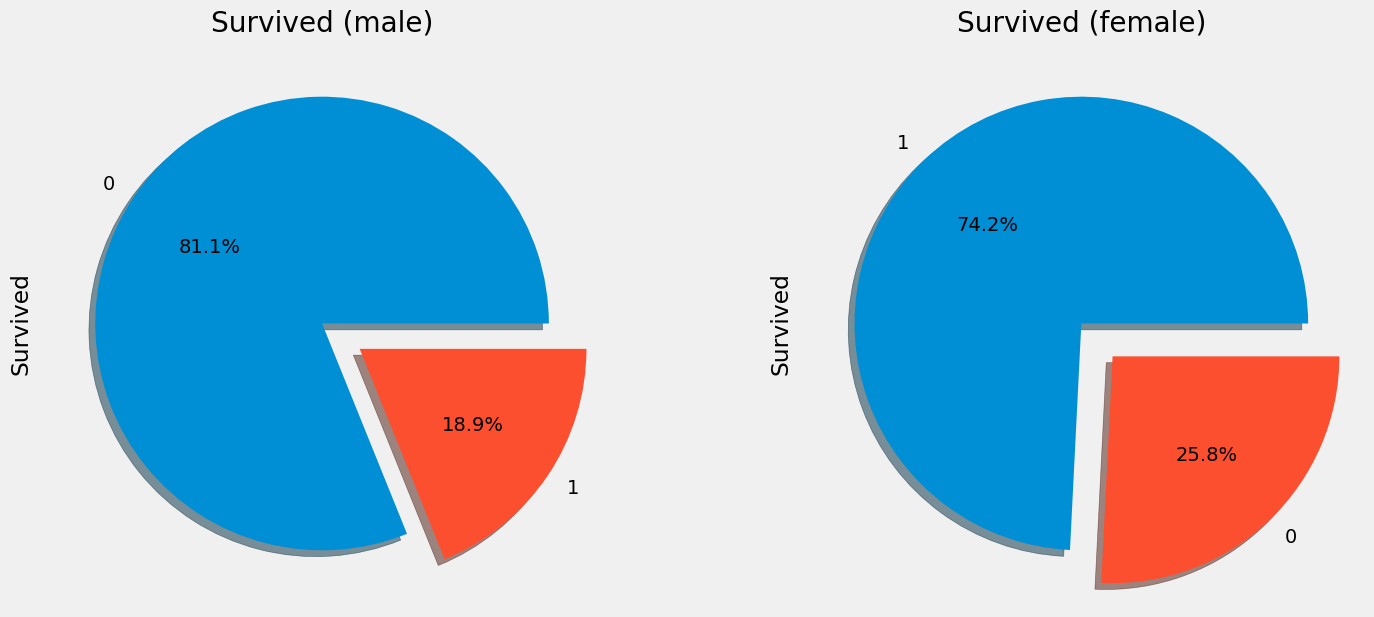

In [ ]:
f,ax=plt.subplots(1,2,figsize=(16,7))
df_titanic['Survived'][df_titanic['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df_titanic['Survived'][df_titanic['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

It is evident that not many passengers survived the accident.

Out of 891 passengers in training set, only around 350 survived i.e Only 44.7% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age,etc.

First let us understand the different types of features.

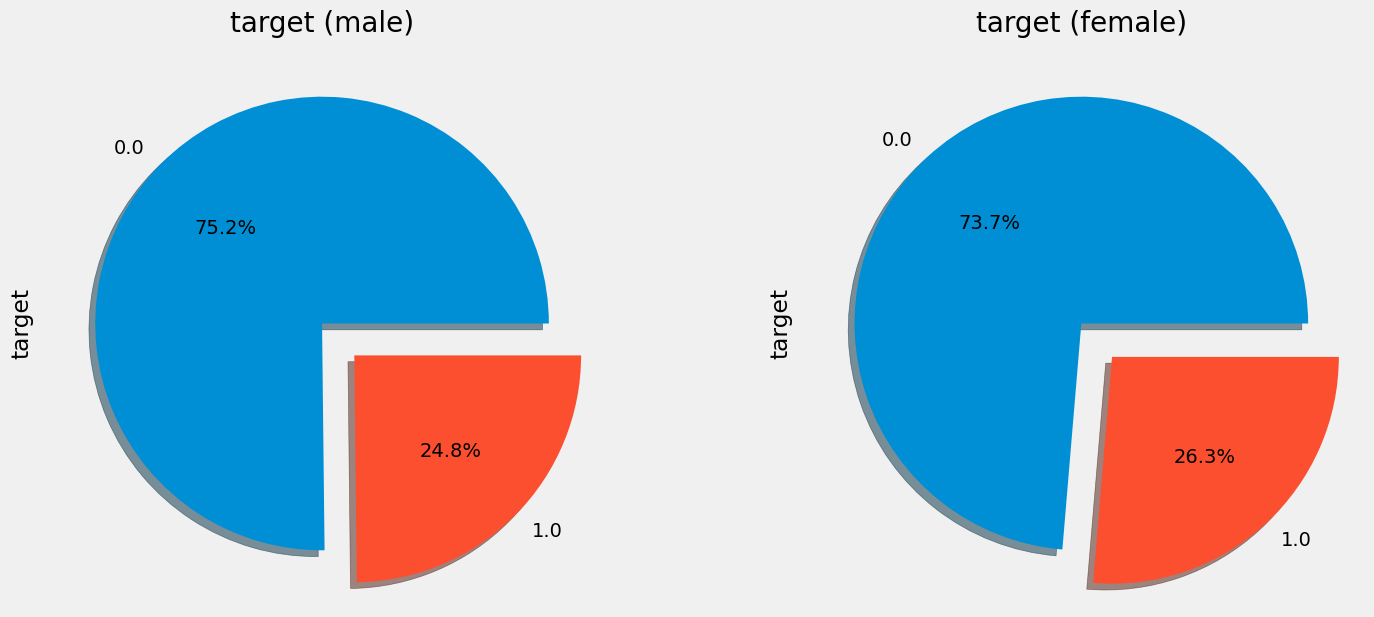

In [ ]:
f,ax=plt.subplots(1,2,figsize=(16,7))
df_job['target'][df_job['gender']=='Male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df_job['target'][df_job['gender']=='Female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('target (male)')
ax[1].set_title('target (female)')

plt.show()

Only 51.1% of the total training set are looking for a job change. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

We will try to check the target using the different features of the dataset.

First let us understand the different types of features.

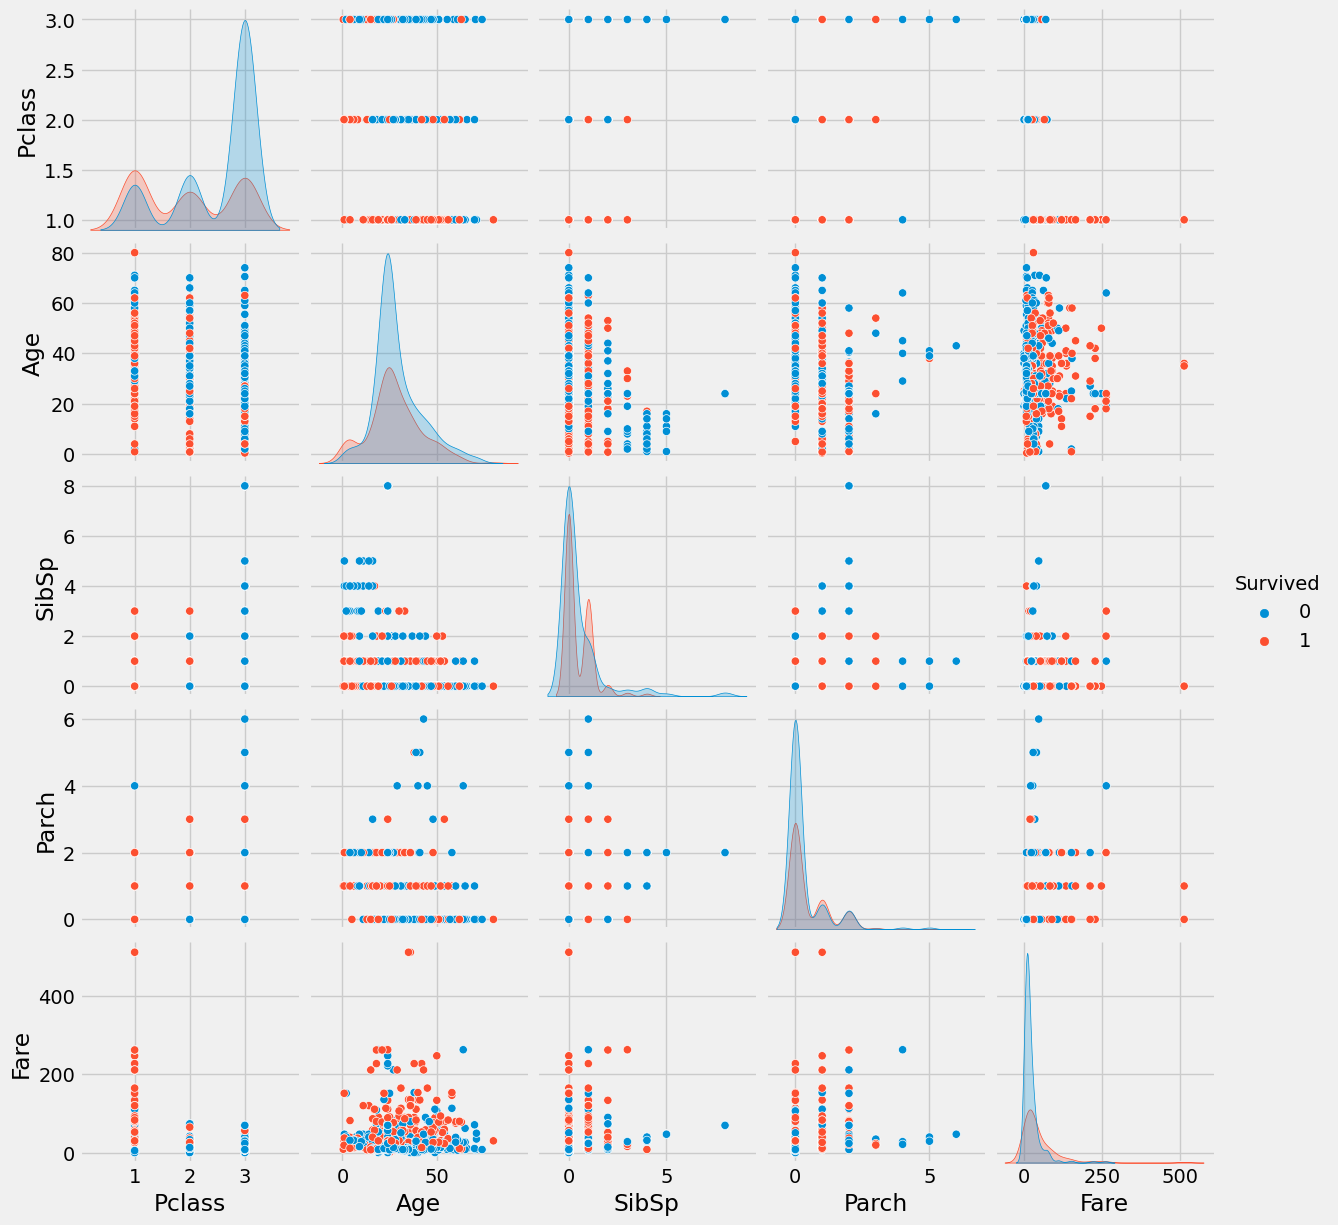

In [ ]:
# Plotting the pairplot for the target column

sns.pairplot(df_titanic,hue='Survived');

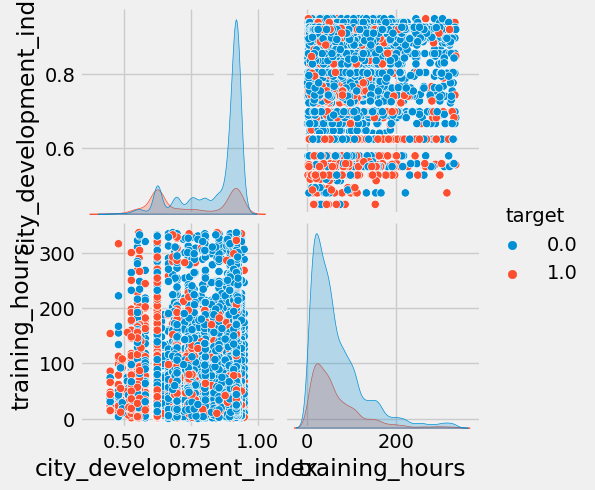

In [ ]:
# Plotting the pairplot for the target column

sns.pairplot(df_job,hue='target');

In [ ]:
#Separating numeric columns from the dataset for plotting box plot

df_titanic_numeric = df_titanic[['Survived','Pclass','Age','SibSp','Parch','Fare']]
df_titanic_numeric.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500


In [ ]:
#Separating numeric columns from the dataset for plotting box plot

df_job_numeric = df_job[['city_development_index','training_hours','target']]
df_job_numeric.head()

,city_development_index,training_hours,target
enrollee_id,,,
8949,0.920,36,1.0
29725,0.776,47,0.0
11561,0.624,83,0.0
33241,0.789,52,1.0
666,0.767,8,0.0


# Box Plot

<Axes: >

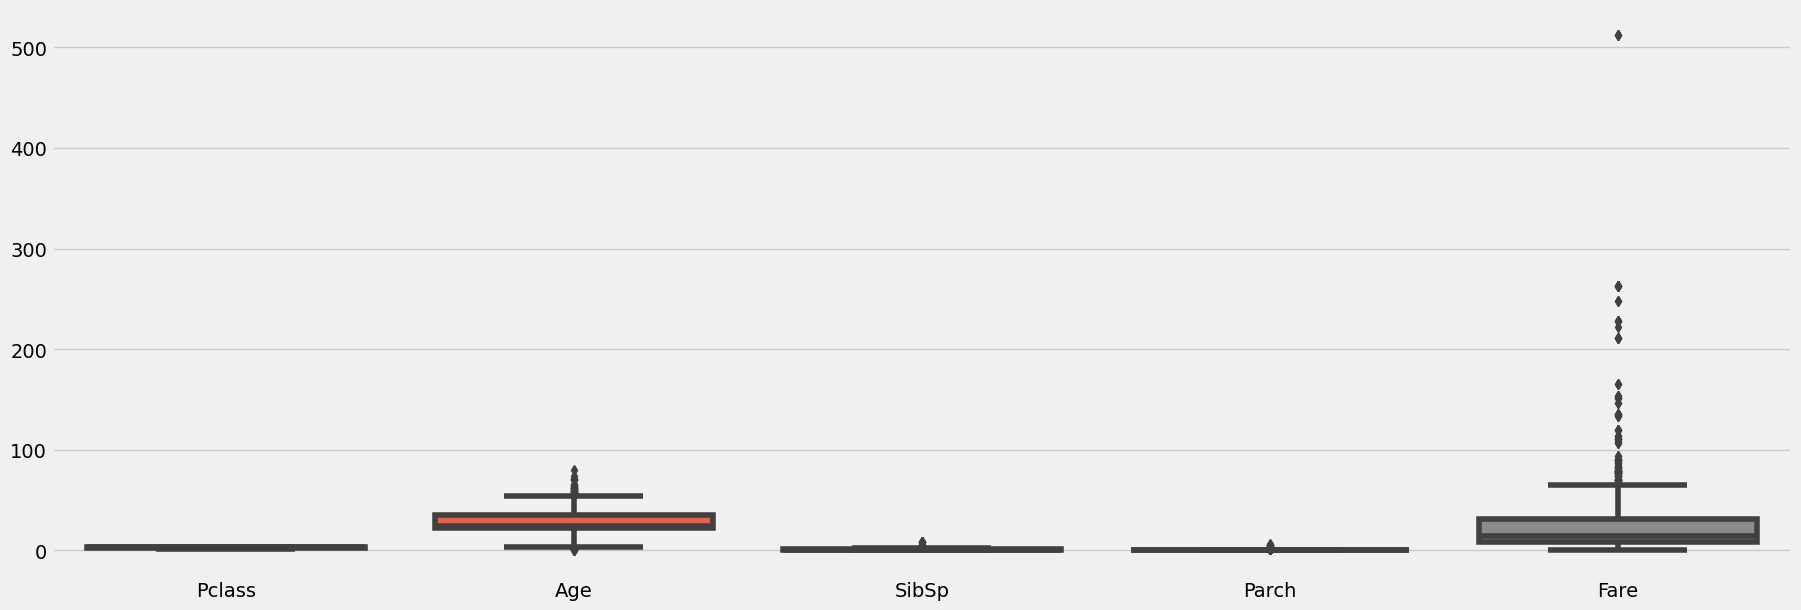

In [ ]:
# Plotting Box plot for numeric data

plt.figure(figsize=(20,7))
sns.boxplot(data=df_titanic_numeric.drop(['Survived'],axis=1))

In the above boxplot, we can see that the Pclass,SibSp and  column plot is not at all visible since the data is not normalized and we cannot see the box plot properly due to huge difference in their range. Hence, normalizing the data in the columns to match the range of other independent variables.

<Axes: >

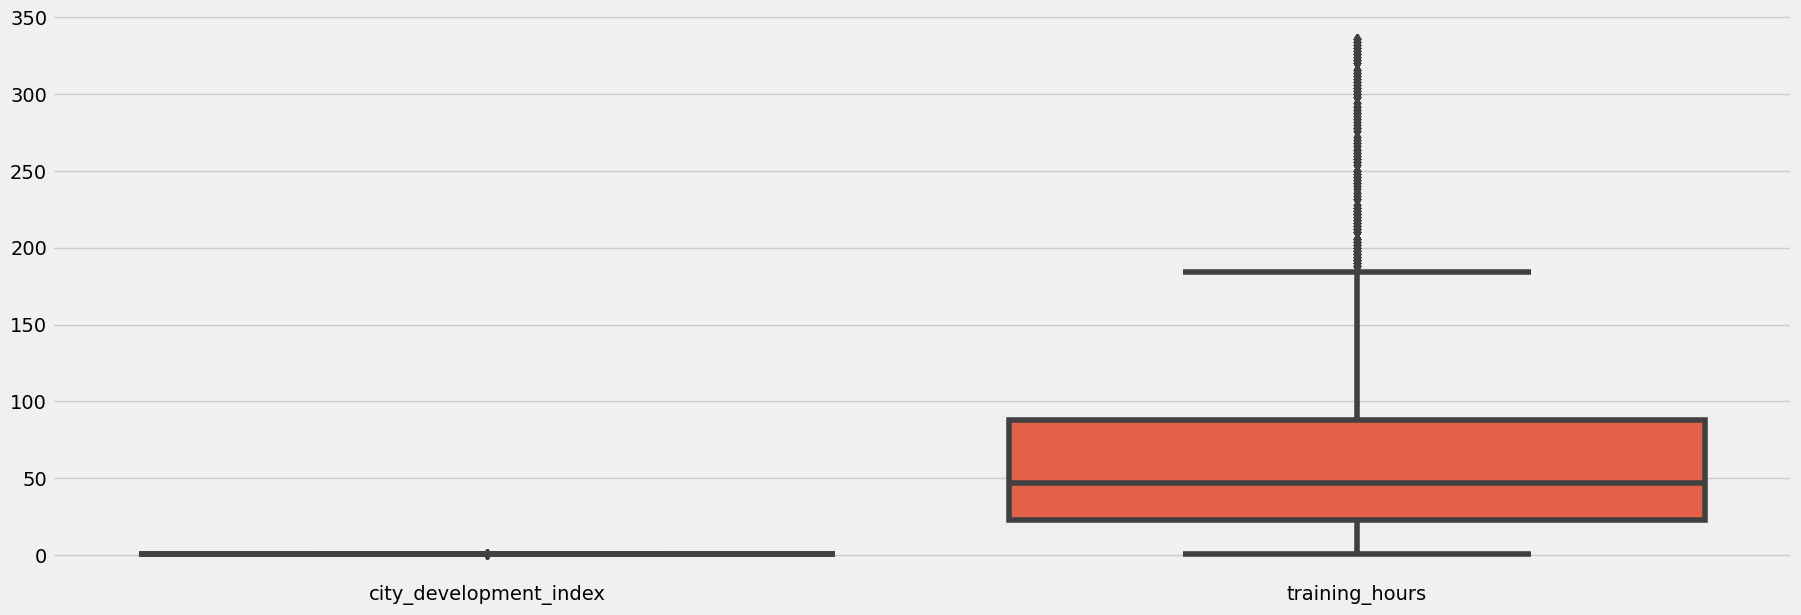

In [ ]:
# Plotting Box plot for numeric data

plt.figure(figsize=(20,7))
sns.boxplot(data=df_job_numeric.drop(['target'],axis=1))

In the above boxplot, we can see that the city development index column plot is not at all visible since the data is not normalized and we cannot see the box plot properly due to huge difference in their range. Hence, normalizing the data in the columns to match the range of other independent variables.

# **Normalizing Data**

In [ ]:
# Normalizing the data in the each column because the value is too high when compared to other independent variable

from sklearn import preprocessing

for column_name in ['Survived','Pclass','Age','SibSp','Parch','Fare']:
    # Create x to store scaled values as floats
    x = df_titanic[[column_name]].values.astype(float)

    # Preparing for normalizing
    min_max_scaler = preprocessing.MinMaxScaler()

    # Transform the data to fit minmax processor
    x_scaled = min_max_scaler.fit_transform(x)

    # Run the normalizer on the dataframe
    df_titanic_numeric[[column_name]] = pd.DataFrame(x_scaled)

<Axes: >

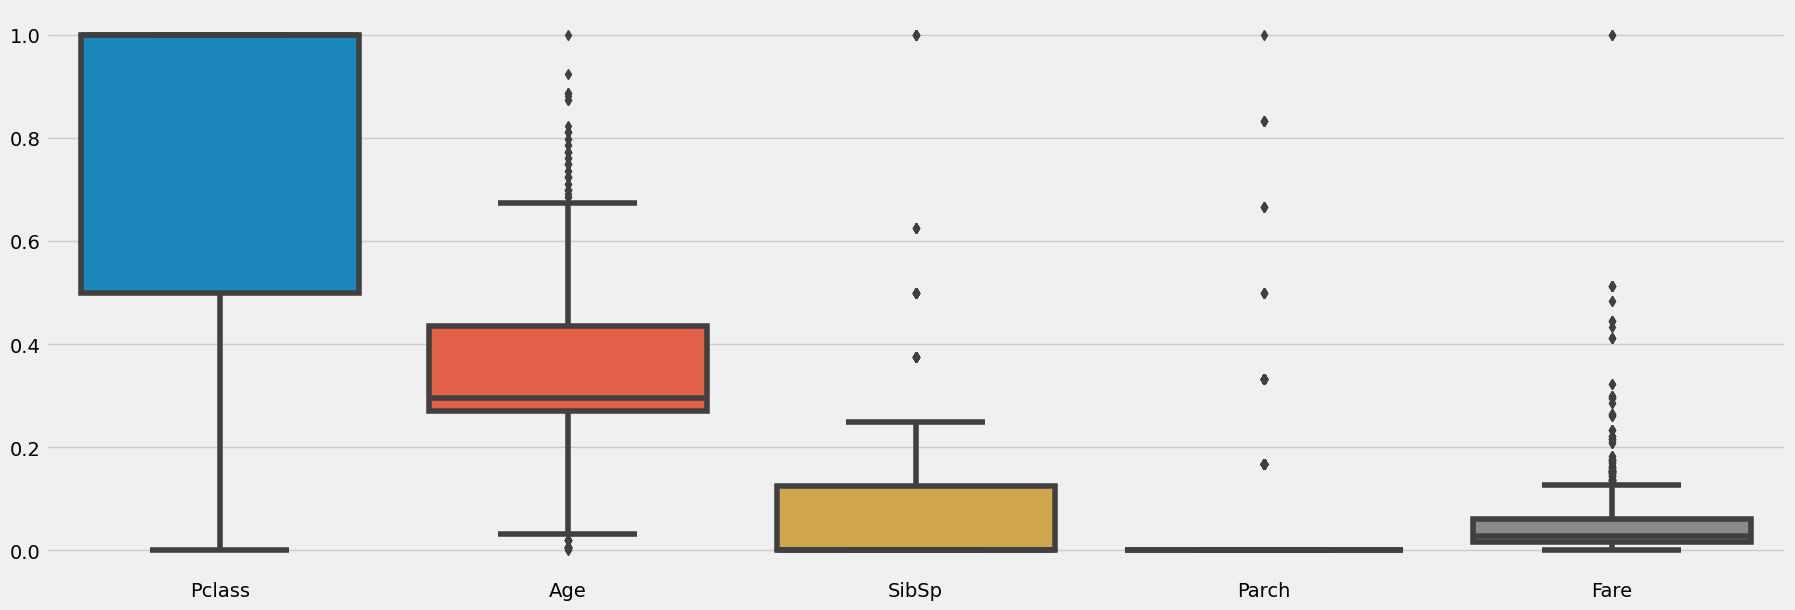

In [ ]:
# Plotting box plot after normalization

plt.figure(figsize=(20,7))
sns.boxplot(data=df_titanic_numeric.drop(['Survived'],axis=1))

In [ ]:
# Normalizing the data in the each column because the value is too high when compared to other independent variable

from sklearn import preprocessing

for column_name in ['city_development_index','training_hours']:
    # Create x to store scaled values as floats
    x = df_job[[column_name]].values.astype(float)

    # Preparing for normalizing
    min_max_scaler = preprocessing.MinMaxScaler()

    # Transform the data to fit minmax processor
    x_scaled = min_max_scaler.fit_transform(x)

    # Run the normalizer on the dataframe
    df_job_numeric[[column_name]] = pd.DataFrame(x_scaled)

<Axes: >

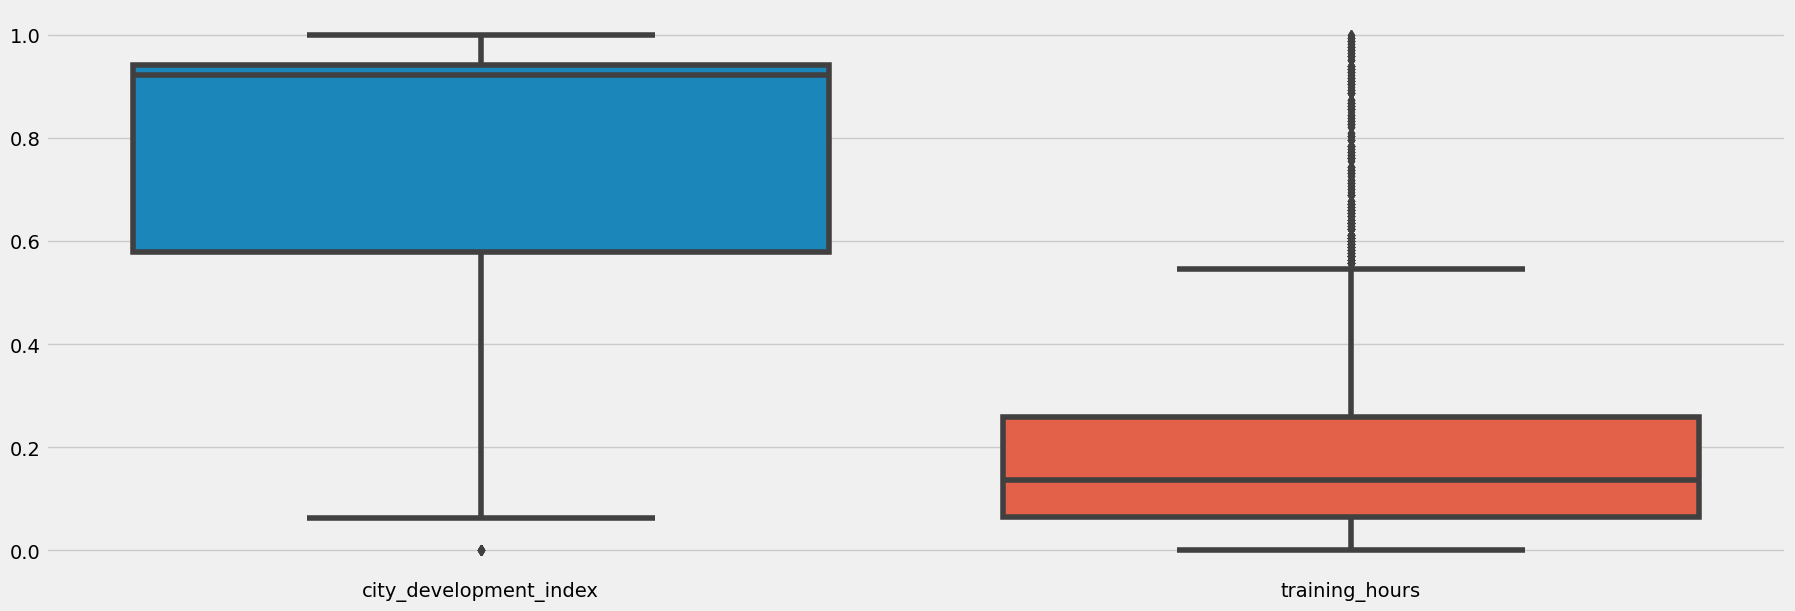

In [ ]:
# Plotting box plot after normalization

plt.figure(figsize=(20,7))
sns.boxplot(data=df_job_numeric.drop(['target'],axis=1))

# **Plotting Heat Map**

<Axes: >

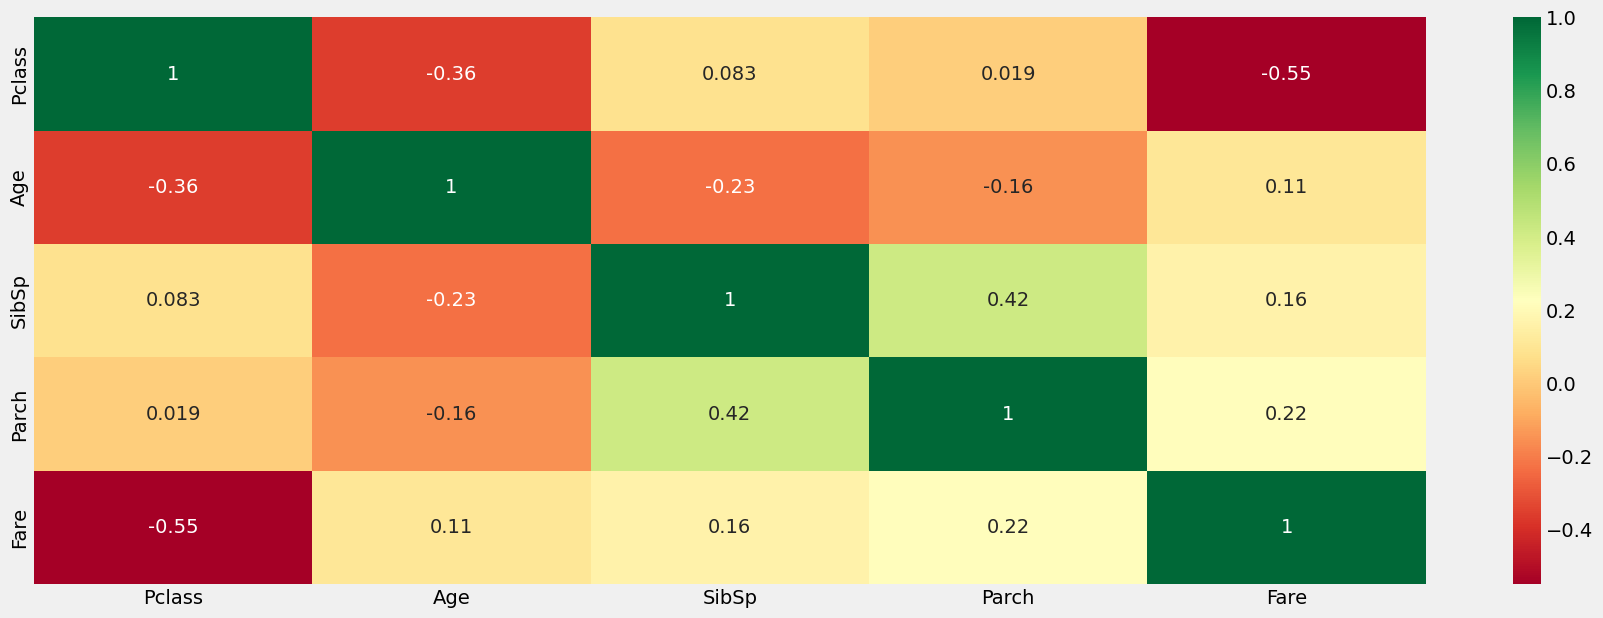

In [ ]:
#Plotting heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(df_titanic_numeric.drop(['Survived'],axis=1).corr(), annot=True, cmap='RdYlGn')

Above is a graphical representation of the correlation between different features in the dataset. The heatmap displays a matrix of colors that represent the strength of the correlation between pairs of variables.

We can calculate the correlation between pairs of variables using a correlation coefficient, such as the Pearson correlation coefficient. This coefficient measures the linear relationship between two variables, with values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). A value of 0 indicates no correlation

The above heatmap displays the correlation coefficients as colors in a matrix, with each variable plotted both on the x and y axis. The color of each cell in the matrix indicates the strength of the correlation between the corresponding pair of variables, with a color scale ranging from low to high .

From the Above Matrix we can conclude a few things

Parch and SibSp are highly correlated.

<Axes: >

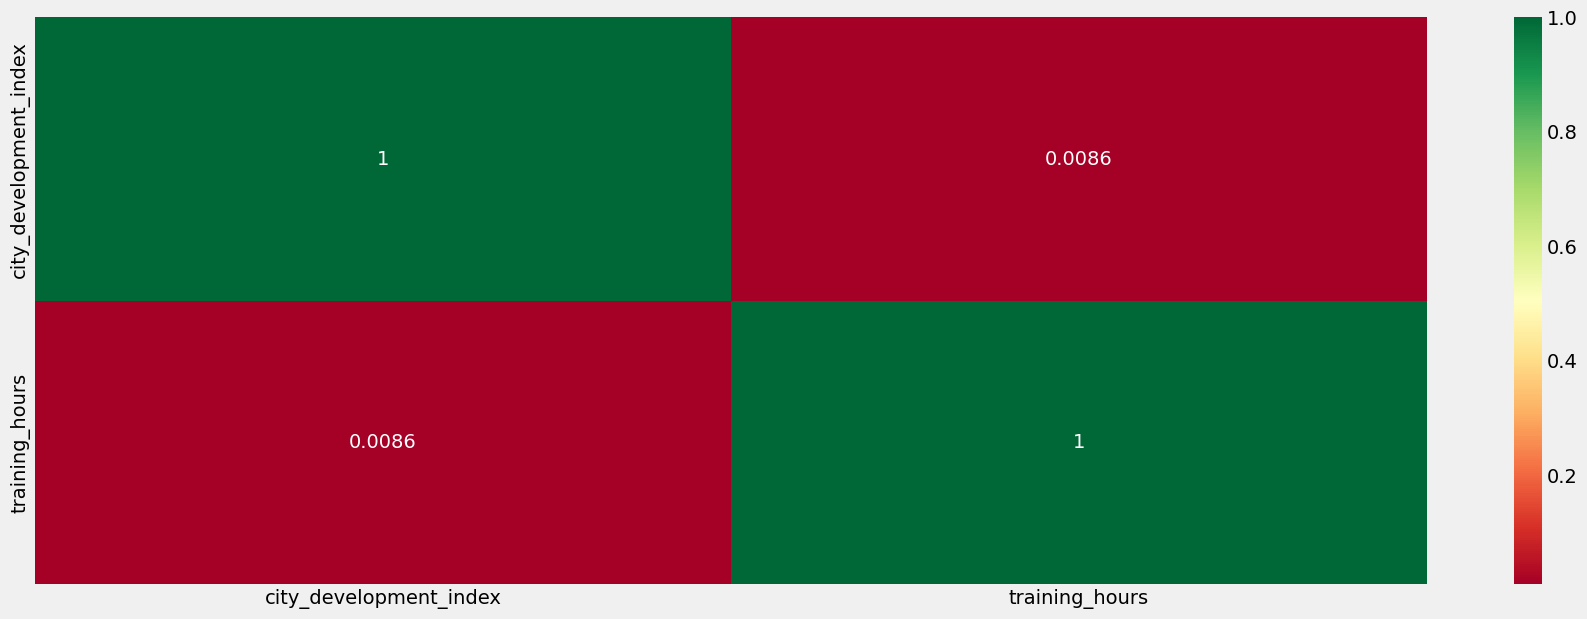

In [ ]:
#Plotting heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(df_job_numeric.drop(['target'],axis=1).corr(), annot=True, cmap='RdYlGn')

Above graph shows the correlation between city_development_index and training_hours.

In [ ]:
#checking the correlation between the numeric features in the data
df_titanic_numeric.drop(['Survived'],axis=1).corr()

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.355911,0.082720,0.018893,-0.549322
Age,-0.355911,1.000000,-0.232225,-0.155424,0.107303
SibSp,0.082720,-0.232225,1.000000,0.415164,0.159935
Parch,0.018893,-0.155424,0.415164,1.000000,0.216015
Fare,-0.549322,0.107303,0.159935,0.216015,1.000000


In [ ]:
#checking the correlation between the numeric features in the data
df_job_numeric.drop(['target'],axis=1).corr()

,city_development_index,training_hours
city_development_index,1.000000,0.008564
training_hours,0.008564,1.000000


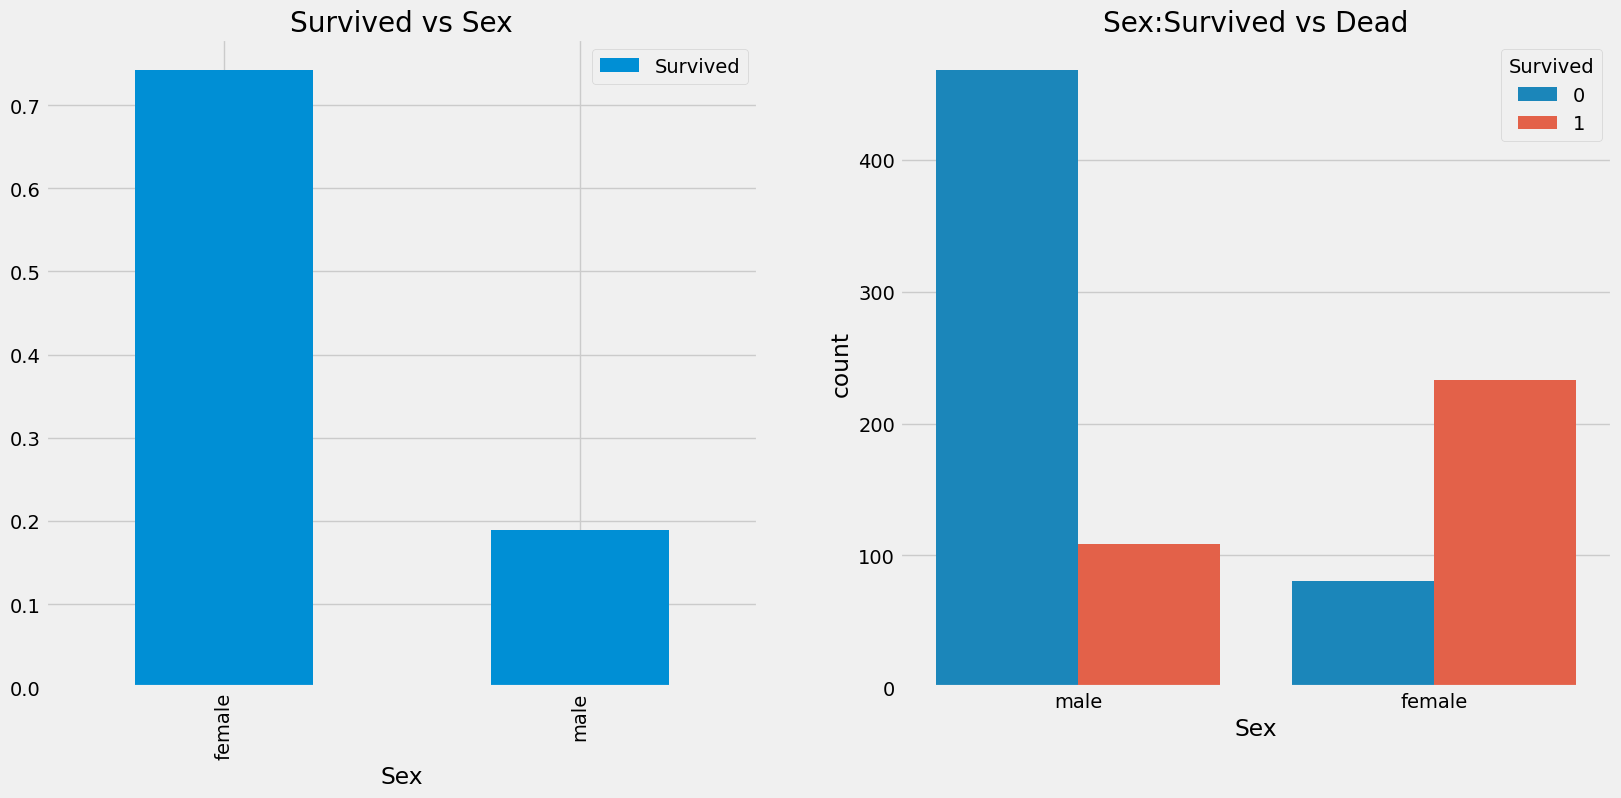

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_titanic[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=df_titanic,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

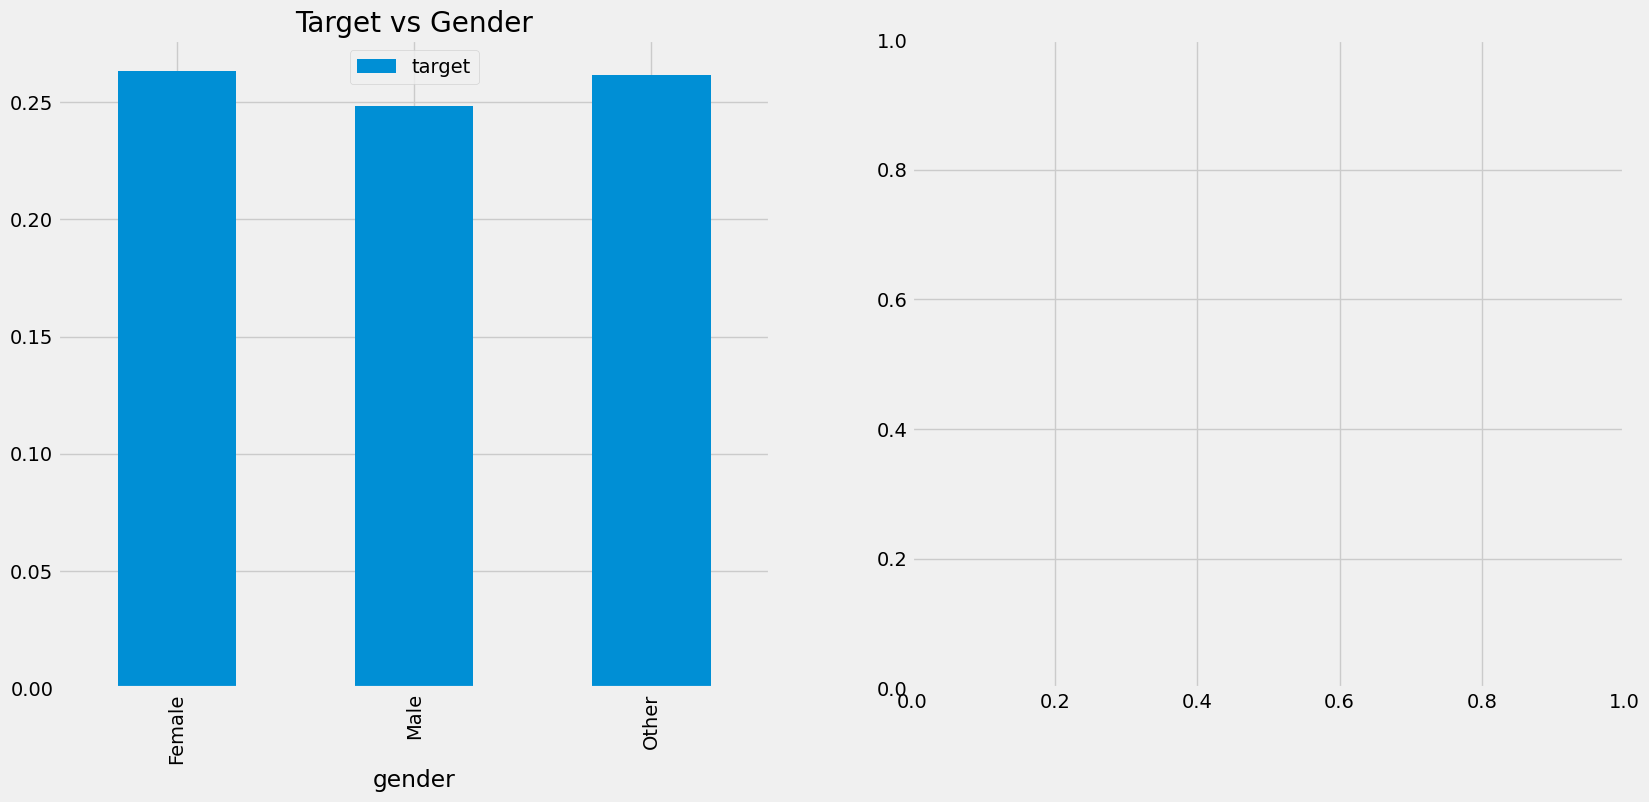

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_job[['gender','target']].groupby(['gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Target vs Gender')
plt.show()

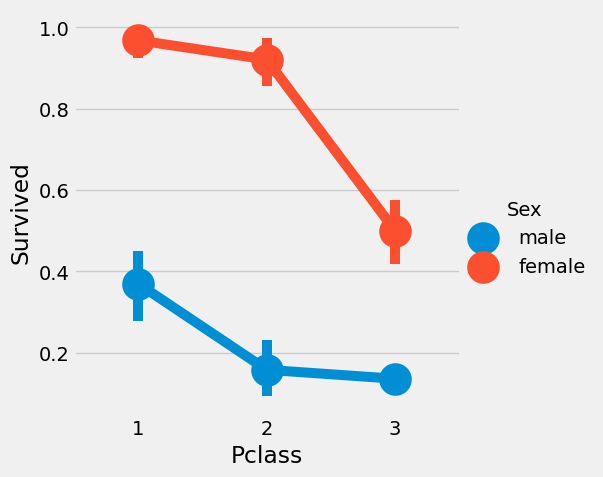

In [ ]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_titanic, kind='point')
plt.show()

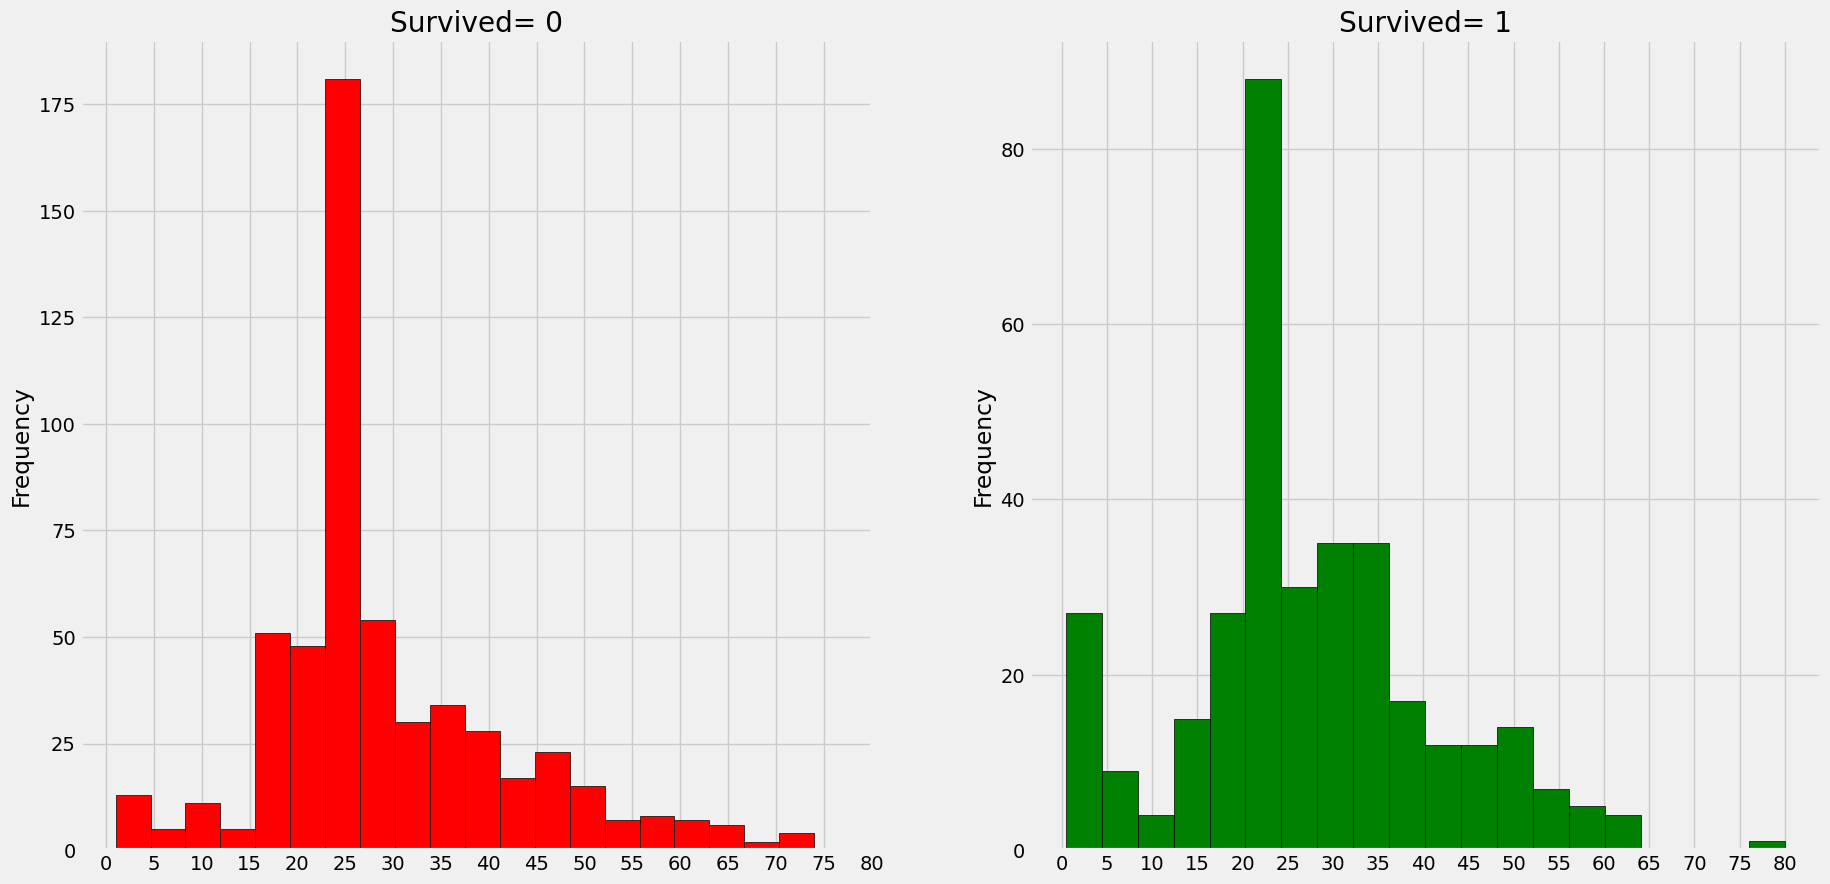

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df_titanic[df_titanic['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df_titanic[df_titanic['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

<Figure size 800x500 with 0 Axes>

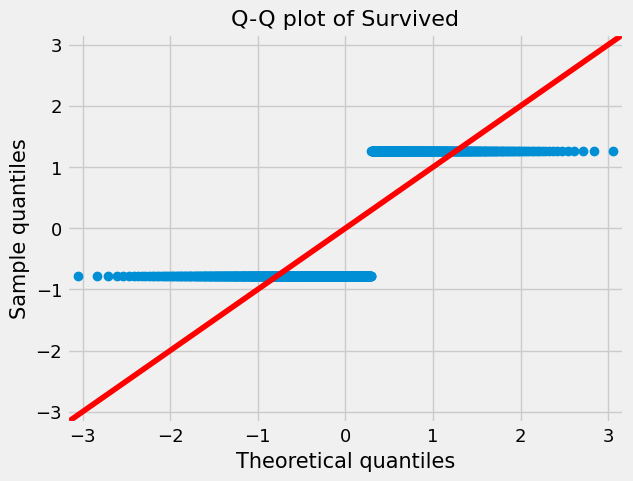

<Figure size 800x500 with 0 Axes>

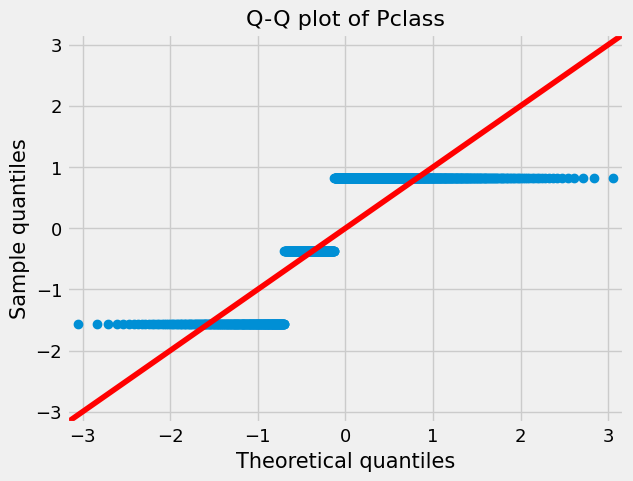

<Figure size 800x500 with 0 Axes>

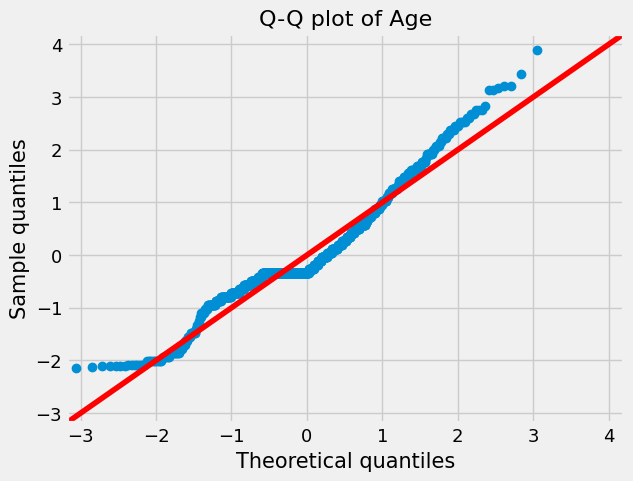

<Figure size 800x500 with 0 Axes>

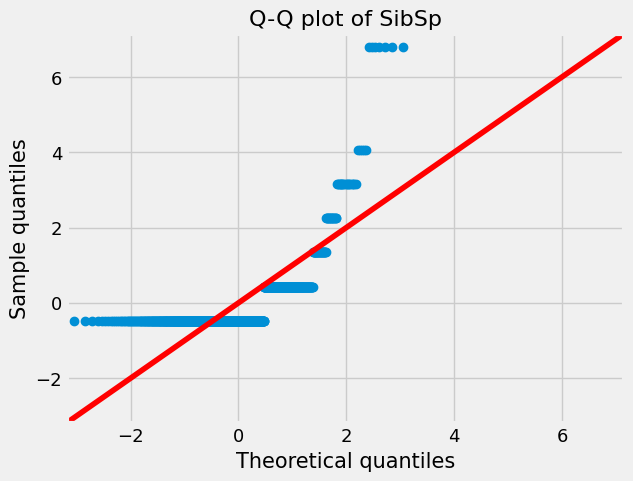

<Figure size 800x500 with 0 Axes>

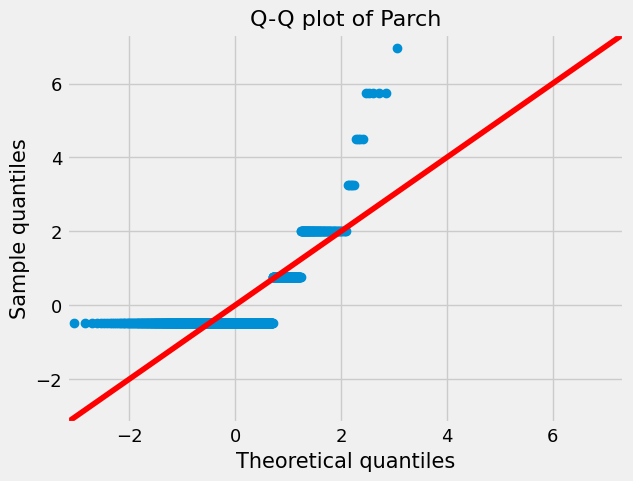

<Figure size 800x500 with 0 Axes>

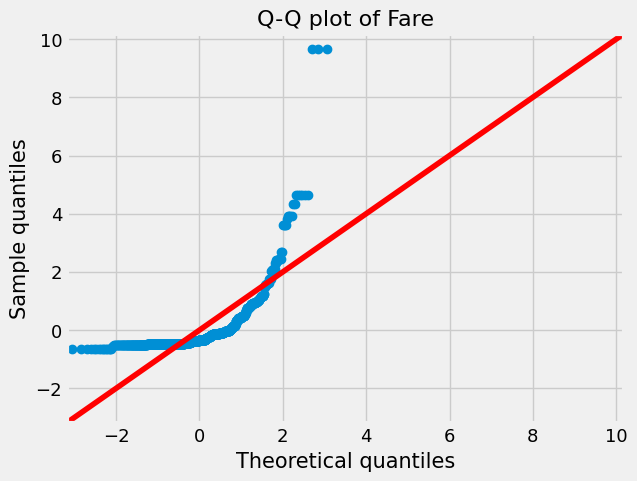

In [ ]:
#checking the distribution of independent variables

from statsmodels.graphics.gofplots import qqplot
data_norm=df_titanic[['Survived','Pclass','Age','SibSp','Parch','Fare']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

1.   Looking at Q-Q plot above, Age %are likely following normal distribution.
2.   There are few outliers in few variables like Pclass, Survived, Sibsp, Parch and Fare.

<Figure size 800x500 with 0 Axes>

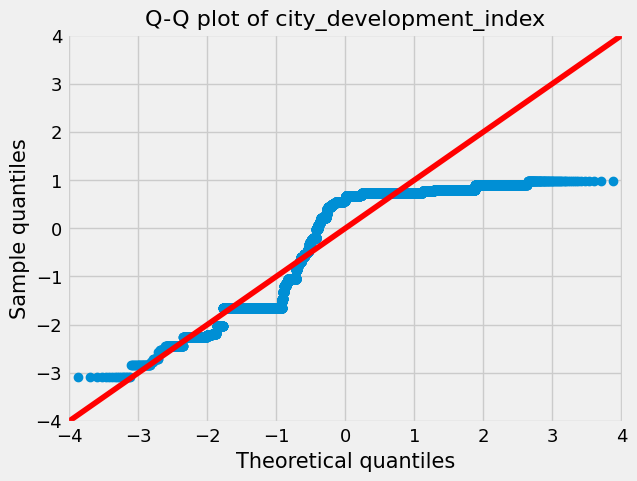

<Figure size 800x500 with 0 Axes>

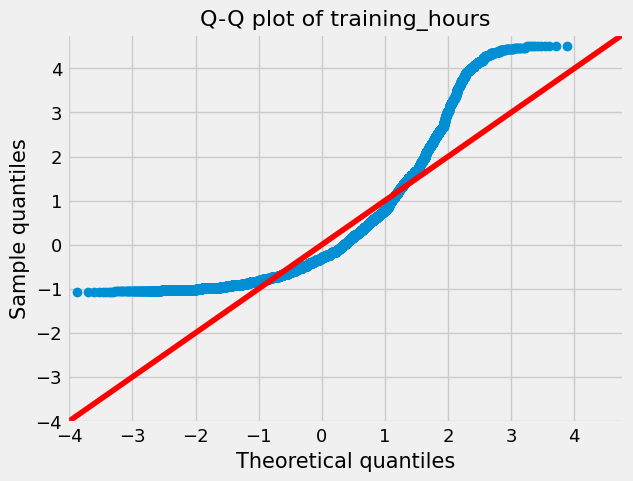

In [ ]:
#checking the distribution of independent variables

from statsmodels.graphics.gofplots import qqplot
data_norm=df_job[['city_development_index', 'training_hours']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

1.   Looking at Q-Q plot above, training_hours %are likely following normal distribution.
2.   There are few outliers in few variables like city_development_index.

# **Part2: Feature Engineering and Data Cleaning**

Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.

An example would be getting the Initals feature using the Name Feature. Lets see if we can get any new features and eliminate a few. Also we will tranform the existing relevant features to suitable form for Predictive Modeling.

In [ ]:
df_titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,B96 B98,S


In [ ]:
# Using one hot encoding to convert categorical data into numeric data fir titanic dataset

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df_titanic[['Name','Sex','Age','Ticket','Fare','Cabin','Embarked']])

encoded_df_titanic = pd.DataFrame(encoded_data.toarray(),
columns=encoder.get_feature_names_out(['Name','Sex','Age','Ticket','Fare','Cabin','Embarked']))

print(encoded_df_titanic)

     Name_Abbing, Mr. Anthony  Name_Abbott, Mr. Rossmore Edward  \
0                         0.0                               0.0   
1                         0.0                               0.0   
2                         0.0                               0.0   
3                         0.0                               0.0   
4                         0.0                               0.0   
..                        ...                               ...   
886                       0.0                               0.0   
887                       0.0                               0.0   
888                       0.0                               0.0   
889                       0.0                               0.0   
890                       0.0                               0.0   

     Name_Abbott, Mrs. Stanton (Rosa Hunt)  Name_Abelson, Mr. Samuel  \
0                                      0.0                       0.0   
1                                      0.0         

In [ ]:
# Using one hot encoding to convert categorical data into numeric data fot job dataset

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df_job[['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']])

encoded_df_job = pd.DataFrame(encoded_data.toarray(),
columns=encoder.get_feature_names_out(['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']))

print(encoded_df_job)

       city_city_1  city_city_10  city_city_100  city_city_101  city_city_102  \
0              0.0           0.0            0.0            0.0            0.0   
1              0.0           0.0            0.0            0.0            0.0   
2              0.0           0.0            0.0            0.0            0.0   
3              0.0           0.0            0.0            0.0            0.0   
4              0.0           0.0            0.0            0.0            0.0   
...            ...           ...            ...            ...            ...   
19153          0.0           0.0            0.0            0.0            0.0   
19154          0.0           0.0            0.0            0.0            0.0   
19155          0.0           0.0            0.0            0.0            0.0   
19156          0.0           0.0            0.0            0.0            0.0   
19157          0.0           0.0            0.0            0.0            0.0   

       city_city_103  city_

In [ ]:
df_titanic = df_titanic.drop(columns=['Name','Age','Ticket','Fare','Cabin','Sex','Embarked'])

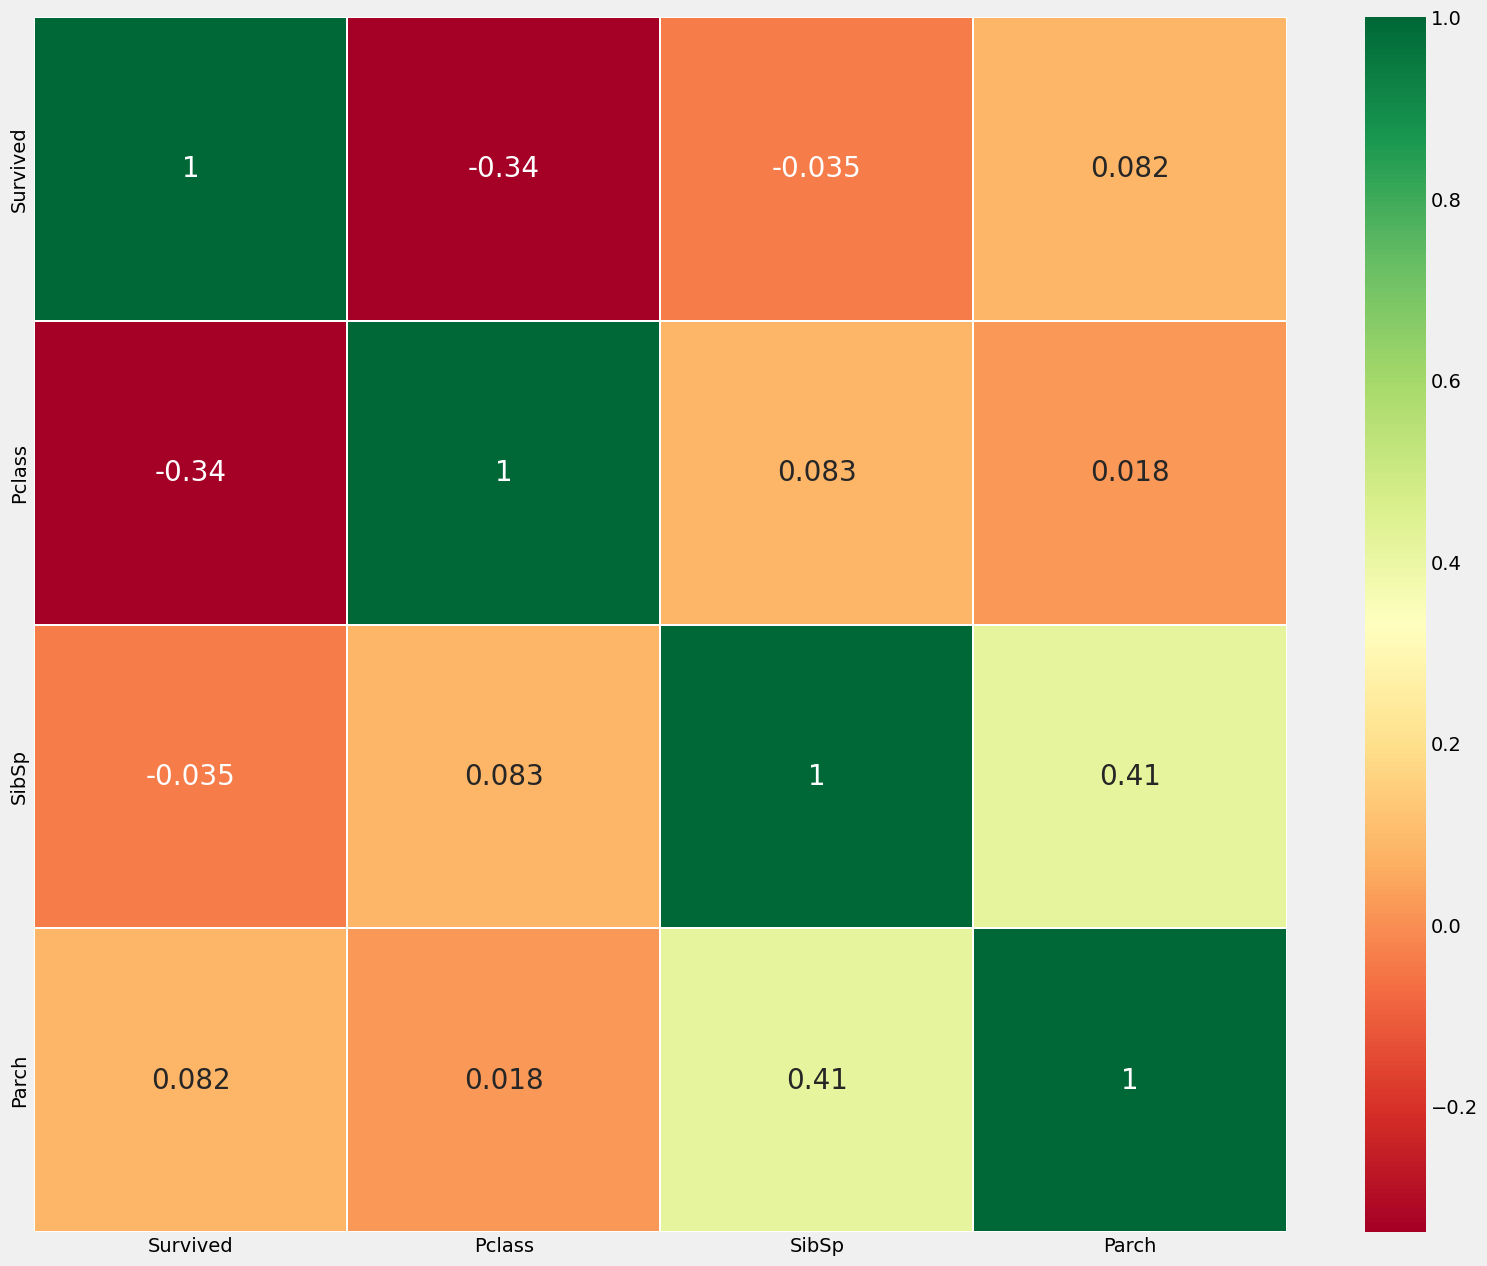

In [ ]:
sns.heatmap(df_titanic.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
df_titanic_new = pd.concat([df_titanic,encoded_df_titanic], axis=1)
df_titanic_new


,Survived,Pclass,SibSp,Parch,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Adahl, Mr. Mauritz Nils Martin",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
1,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,0.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
890,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
891,0.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Dropping categorical data from the data set

df_job = df_job.drop(columns=['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job'])

In [ ]:
df_job_new = pd.concat([df_job,encoded_df_job], axis=1)
df_job_new

,city_development_index,training_hours,target,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
8949,0.920,36.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
29725,0.776,47.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11561,0.624,83.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
33241,0.789,52.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
666,0.767,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19149,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
19151,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
19152,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19154,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# **Part3: Predictive Modeling**

We have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whether a passenger will survive or die. So now we will predict the whether the Passenger will survive or not using some great Classification Algorithms.Following are the algorithms I will use to make the model:

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

In [ ]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

# **Splitting Data into Testing and Training Data**

# Titanic Dataset:

In [ ]:
df_titanic

,Survived,Pclass,SibSp,Parch
PassengerId,,,,
1,0,3,1,0
2,1,1,1,0
3,1,3,0,0
4,1,1,1,0
5,0,3,0,0
...,...,...,...,...
887,0,2,0,0
888,1,1,0,0
889,0,3,1,2


In [ ]:
train,test=train_test_split(df_titanic,test_size=0.3,random_state=0,stratify=df_titanic['Survived'])
train_titanic_X=train[train.columns[1:]]
train_titanic_Y=train[train.columns[:1]]
test_titanic_X=test[test.columns[1:]]
test_titanic_Y=test[test.columns[:1]]
titanic_X=df_titanic[df_titanic.columns[1:]]
titanic_Y=df_titanic['Survived']

In [ ]:
train_titanic_X

,Pclass,SibSp,Parch
PassengerId,,,
232,3,0,0
837,3,0,0
640,3,1,0
390,2,0,0
598,3,0,0
...,...,...,...
132,3,0,0
491,3,1,0
839,3,0,0


In [ ]:
train_titanic_Y

,Survived
PassengerId,
232,0
837,0
640,0
390,1
598,0
...,...
132,0
491,0
839,1


In [ ]:
titanic_X

,Pclass,SibSp,Parch
PassengerId,,,
1,3,1,0
2,1,1,0
3,3,0,0
4,1,1,0
5,3,0,0
...,...,...,...
887,2,0,0
888,1,0,0
889,3,1,2


In [ ]:
titanic_Y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

# Radial Support Vector Machines(rbf-SVM)

In [ ]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_titanic_X,train_titanic_Y)
prediction1=model.predict(test_titanic_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_titanic_Y))

Accuracy for rbf SVM is  0.6940298507462687


# Linear Support Vector Machine(linear-SVM)

In [ ]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_titanic_X,train_titanic_Y)
prediction2=model.predict(test_titanic_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_titanic_Y))

Accuracy for linear SVM is 0.6828358208955224


# Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(train_titanic_X,train_titanic_Y)
prediction3=model.predict(test_titanic_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_titanic_Y))

The accuracy of the Logistic Regression is 0.6753731343283582


# Decision Tree

In [ ]:
model=DecisionTreeClassifier()
model.fit(train_titanic_X,train_titanic_Y)
prediction4=model.predict(test_titanic_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_titanic_Y))

The accuracy of the Decision Tree is 0.7089552238805971


# K-Nearest Neighbours(KNN)

In [ ]:
model=KNeighborsClassifier()
model.fit(train_titanic_X,train_titanic_Y)
prediction5=model.predict(test_titanic_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_titanic_Y))

The accuracy of the KNN is 0.664179104477612


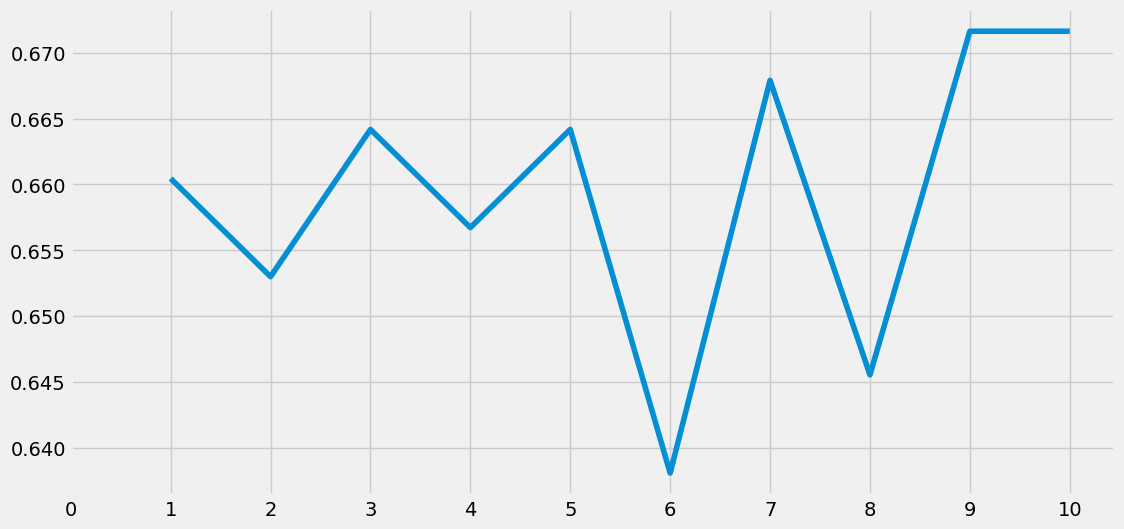

Accuracies for different values of n are: [0.66044776 0.65298507 0.6641791  0.65671642 0.6641791  0.6380597
 0.66791045 0.64552239 0.67164179 0.67164179] with the max value as  0.6716417910447762


In [ ]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_titanic_X,train_titanic_Y)
    prediction=model.predict(test_titanic_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_titanic_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())


# Gaussian Naive Bayes

In [ ]:
model=GaussianNB()
model.fit(train_titanic_X,train_titanic_Y)
prediction6=model.predict(test_titanic_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_titanic_Y))

The accuracy of the NaiveBayes is 0.6828358208955224


# Random Forests

In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_titanic_X,train_titanic_Y)
prediction7=model.predict(test_titanic_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_titanic_Y))

The accuracy of the Random Forests is 0.7089552238805971


The accuracy of a model is not the only factor that determines the robustness of the classifier. Let's say that a classifier is trained over a training data and tested over the test data and it scores an accuracy of 90%.

Now this seems to be very good accuracy for a classifier, but can we confirm that it will be 90% for all the new test sets that come over??. The answer is No, because we can't determine which all instances will the classifier will use to train itself. As the training and testing data changes, the accuracy will also change. It may increase or decrease. This is known as model variance.

To overcome this and get a generalized model,we use Cross Validation.

# Cross Validation

Many a times, the data is imbalanced, i.e there may be a high number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset.

1)The K-Fold Cross Validation works by first dividing the dataset into k-subsets.

2)Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.

3)We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.

This is called K-Fold Cross Validation.

4)An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, shuffle=True, random_state=22)
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,titanic_X,titanic_Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.671199,0.017945
Radial Svm,0.690250,0.026964
Logistic Regression,0.687978,0.047159
KNN,0.595993,0.106331
Decision Tree,0.707091,0.044916
Naive Bayes,0.654320,0.028329
Random Forest,0.709338,0.046826


<Axes: >

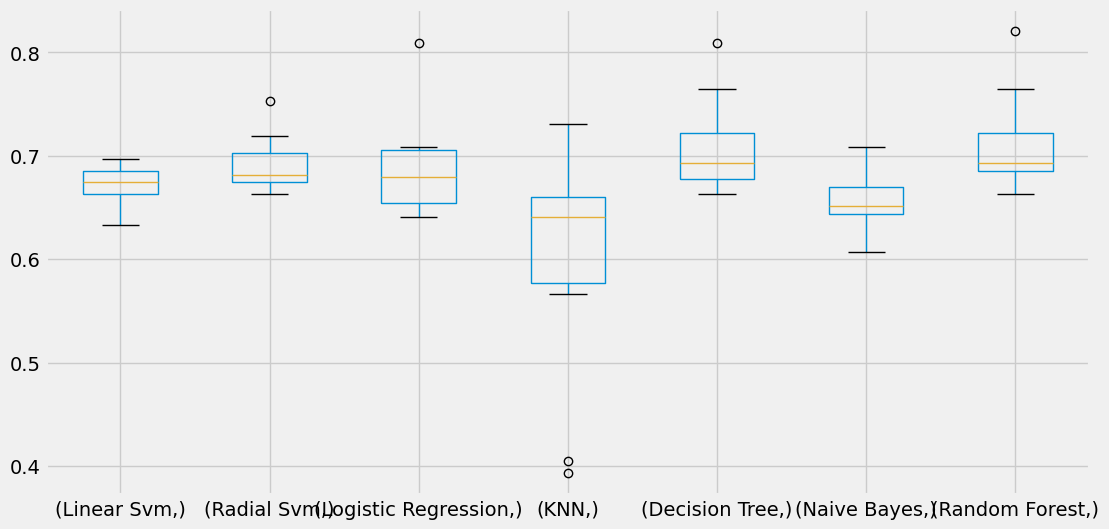

In [ ]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

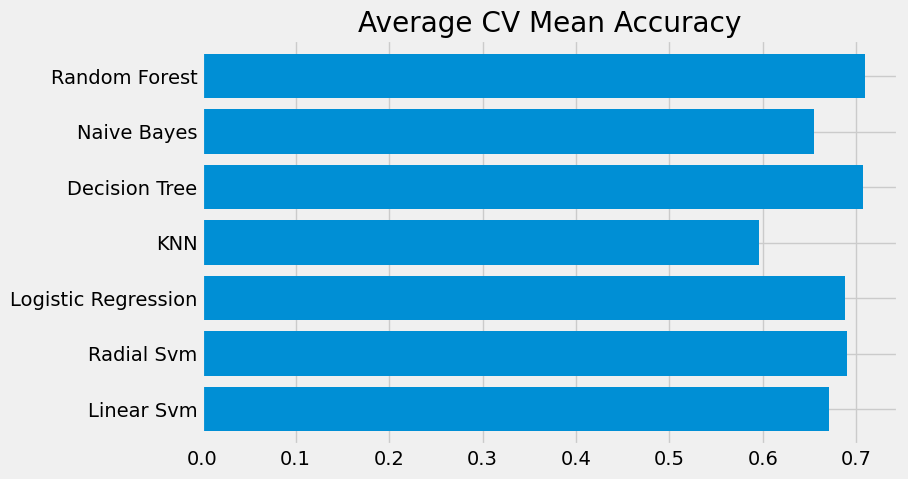

In [ ]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

The classification accuracy can be sometimes misleading due to imbalance. We can get a summarized result with the help of confusion matrix, which shows where did the model go wrong, or which class did the model predict wrong.

# **Confusion Matrix**

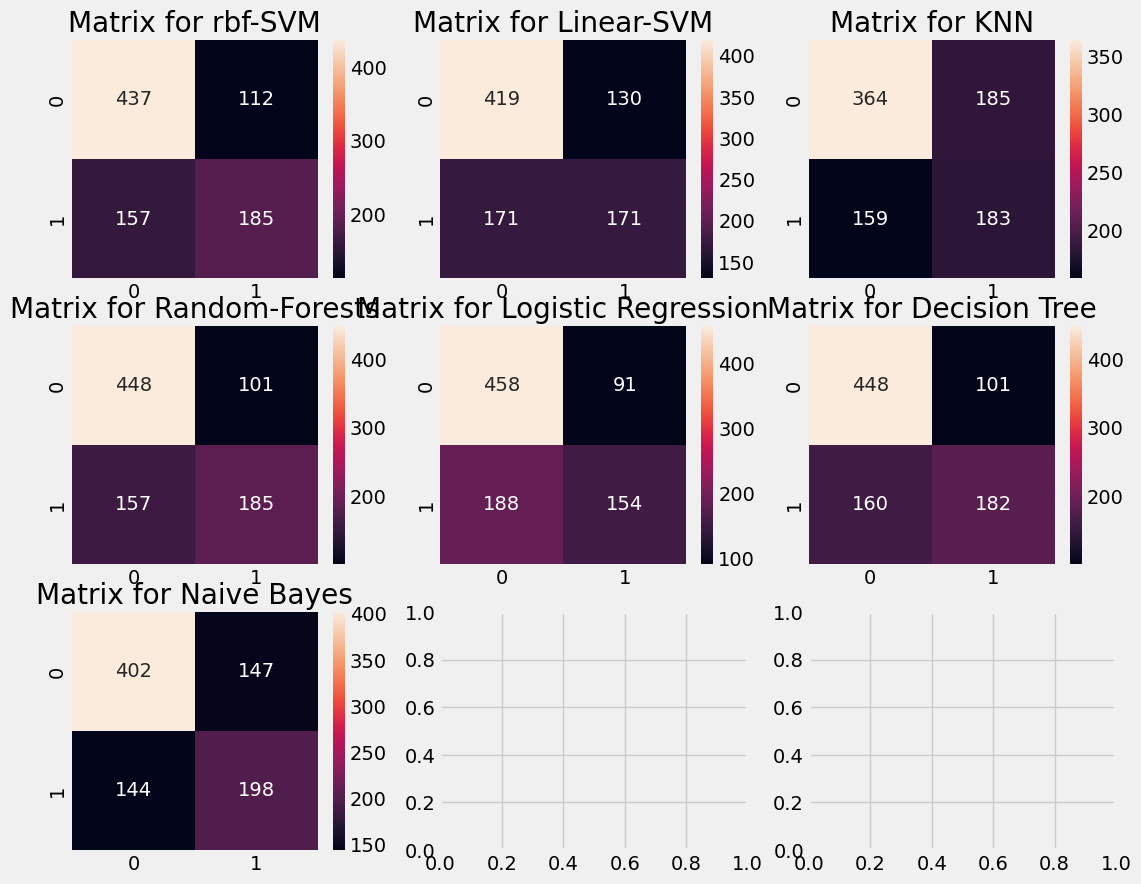

In [ ]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),titanic_X,titanic_Y,cv=10)
sns.heatmap(confusion_matrix(titanic_Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),titanic_X,titanic_Y,cv=10)
sns.heatmap(confusion_matrix(titanic_Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),titanic_X,titanic_Y,cv=10)
sns.heatmap(confusion_matrix(titanic_Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),titanic_X,titanic_Y,cv=10)
sns.heatmap(confusion_matrix(titanic_Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),titanic_X,titanic_Y,cv=10)
sns.heatmap(confusion_matrix(titanic_Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),titanic_X,titanic_Y,cv=10)
sns.heatmap(confusion_matrix(titanic_Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),titanic_X,titanic_Y,cv=10)
sns.heatmap(confusion_matrix(titanic_Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

**Interpreting Confusion Matrix**

The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong prredictions made. Lets consider the first plot for rbf-SVM:

1)The no. of correct predictions are 491(for dead) + 247(for survived) with the mean CV accuracy being (491+247)/891 = 82.8% which we did get earlier.

2)Errors--> Wrongly Classified 58 dead people as survived and 95 survived as dead. Thus it has made more mistakes by predicting dead as survived.

By looking at all the matrices, we can say that rbf-SVM has a higher chance in correctly predicting dead passengers but NaiveBayes has a higher chance in correctly predicting passengers who survived.

**Hyper-Parameters Tuning**

The machine learning models are like a Black-Box. There are some default parameter values for this Black-Box, which we can tune or change to get a better model. Like the C and gamma in the SVM model and similarly different parameters for different classifiers, are called the hyper-parameters, which we can tune to change the learning rate of the algorithm and get a better model. This is known as Hyper-Parameter Tuning.

We will tune the hyper-parameters for the 2 best classifiers i.e the SVM and RandomForests.

# SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(titanic_X,titanic_Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.7127801142426715
SVC(C=0.2, gamma=0.2)


# Random Forests

In [ ]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(titanic_X,titanic_Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.7105329232314356
RandomForestClassifier(n_estimators=200, random_state=0)


The best score for Rbf-Svm is 82.60% with C=0.05 and gamma=0.1. For RandomForest, score is abt 81.9% with n_estimators=300.



# **Ensembling**

Ensembling is a good way to increase the accuracy or performance of a model. In simple words, it is the combination of various simple models to create a single powerful model.

Lets say we want to buy a phone and ask many people about it based on various parameters. So then we can make a strong judgement about a single product after analysing all different parameters. This is Ensembling, which improves the stability of the model. Ensembling can be done in ways like:

1)Voting Classifier

2)Bagging

3)Boosting.

# Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ],
                       voting='soft').fit(train_titanic_X,train_titanic_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_titanic_X,test_titanic_Y))
cross=cross_val_score(ensemble_lin_rbf,titanic_X,titanic_Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.6977611940298507
The cross validated score is 0.7094132334581772


# **Bagging**

Bagging is a general ensemble method. It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions. Due to the averaging,there is reduction in variance. Unlike Voting Classifier, Bagging makes use of similar classifiers.

# Bagged KNN

Bagging works best with models with high variance. An example for this can be Decision Tree or Random Forests. We can use KNN with small value of n_neighbours, as small value of n_neighbours.

In [ ]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_titanic_X,train_titanic_Y)
prediction=model.predict(test_titanic_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_titanic_Y))
result=cross_val_score(model,titanic_X,titanic_Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.7089552238805971
The cross validated score for bagged KNN is: 0.7082771535580525


# **Boosting**

Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model.Boosting works as follows:

A model is first trained on the complete dataset. Now the model will get some instances right while some wrong. Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to it. Thus it will try to predict the wrong instance correctly. Now this iterative process continous, and new classifers are added to the model until the limit is reached on the accuracy.

# AdaBoost(Adaptive Boosting)

The weak learner or estimator in this case is a Decsion Tree. But we can change the dafault base_estimator to any algorithm of our choice.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,titanic_X,titanic_Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.7015730337078651


# Stochastic Gradient Boosting

Here too the weak learner is a Decision Tree.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,titanic_X,titanic_Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.7094007490636705


# XGBoost

In [ ]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,titanic_X,titanic_Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.7071535580524345


# **Confusion Matrix for the Best Model**

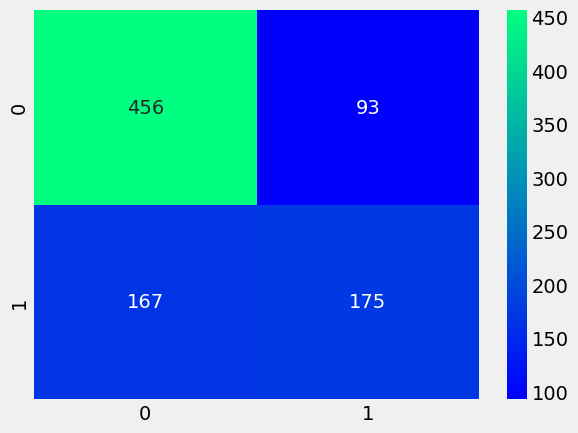

In [ ]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,titanic_X,titanic_Y,cv=10)
sns.heatmap(confusion_matrix(titanic_Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

# **Job Dataset:**

In [ ]:
df_job

,city_development_index,training_hours,target
enrollee_id,,,
8949,0.920,36,1.0
29725,0.776,47,0.0
11561,0.624,83,0.0
33241,0.789,52,1.0
666,0.767,8,0.0
...,...,...,...
7386,0.878,42,1.0
31398,0.920,52,1.0
24576,0.920,44,0.0


In [ ]:
# Correlating the data

df_job_new_corr = df_job_new.corr()
df_job_new_corr

,city_development_index,training_hours,target,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
city_development_index,1.000000,0.001920,-0.341665,-0.000790,-0.020917,0.001493,0.006280,-0.003653,-0.006589,-0.018793,...,-0.007112,-0.003888,0.000243,0.003290,-0.021647,-0.002410,0.000131,-0.001837,0.022267,0.010857
training_hours,0.001920,1.000000,-0.021577,-0.008789,0.005728,0.010548,0.008344,0.005847,-0.018580,-0.005956,...,-0.016680,0.009741,0.009127,-0.001962,0.007949,-0.012759,0.008942,-0.014518,0.005946,-0.000975
target,-0.341665,-0.021577,1.000000,-0.018970,0.015763,-0.013438,-0.005932,0.008443,-0.002155,0.013327,...,-0.007039,-0.010200,0.001068,0.006654,0.010791,-0.009718,-0.001456,0.019289,-0.020783,0.005529
city_city_1,-0.000790,-0.008789,-0.018970,1.000000,-0.002475,-0.004449,-0.002311,-0.004681,-0.019995,-0.004658,...,-0.006164,-0.002939,0.004586,0.005109,0.001469,-0.007658,0.010151,0.003796,-0.005508,0.002853
city_city_10,-0.020917,0.005728,0.015763,-0.002475,1.000000,-0.008104,-0.004210,-0.008527,-0.036423,-0.008484,...,0.003174,-0.005354,0.009734,-0.011786,-0.004702,0.006496,-0.002071,0.004782,0.012901,-0.016377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
last_new_job_2,-0.002410,-0.012759,-0.009718,-0.007658,0.006496,-0.009339,-0.007820,-0.004682,0.018685,-0.007686,...,-0.012415,0.001257,0.031076,-0.029067,-0.375697,1.000000,-0.100362,-0.100620,-0.192310,-0.161804
last_new_job_3,0.000131,0.008942,-0.001456,0.010151,-0.002071,-0.001363,-0.014897,-0.006033,0.017843,-0.005763,...,-0.002636,-0.001369,0.023411,-0.006784,-0.211385,-0.100362,1.000000,-0.056614,-0.108203,-0.091039
last_new_job_4,-0.001837,-0.014518,0.019289,0.003796,0.004782,0.004340,-0.007520,0.001245,0.031538,0.023892,...,0.000023,-0.007304,-0.003505,0.005542,-0.211930,-0.100620,-0.056614,1.000000,-0.108482,-0.091274
last_new_job_>4,0.022267,0.005946,-0.020783,-0.005508,0.012901,-0.002590,-0.015248,-0.010196,0.084248,-0.001882,...,0.015766,0.017856,0.032432,0.037362,-0.405050,-0.192310,-0.108203,-0.108482,1.000000,-0.174446


In [ ]:
df_job_new_corr.isnull().sum()

city_development_index    1
training_hours            1
target                    1
city_city_1               0
city_city_10              0
                         ..
last_new_job_2            0
last_new_job_3            0
last_new_job_4            0
last_new_job_>4           0
last_new_job_never        0
Length: 187, dtype: int64

In [ ]:
df_train_per1 = df_job_new[['city_development_index','training_hours']];
col_list = ['city_development_index','training_hours']
for col in col_list:
    df_train_per1.loc[df_train_per1.sample(frac=0.01).index, col] = pd.np.nan

# Removing 5% data from dataframe

df_train_per5 = df_job_new[['city_development_index','training_hours']];
col_list = ['city_development_index','training_hours']
for col in col_list:
    df_train_per5.loc[df_train_per5.sample(frac=0.05).index, col] = pd.np.nan

# Removing 10% data from dataframe

df_train_per10 = df_job_new[['city_development_index','training_hours']];
col_list = ['city_development_index','training_hours']
for col in col_list:
    df_train_per10.loc[df_train_per10.sample(frac=0.10).index, col] = pd.np.nan


In [ ]:
#checking percent of misssing data
df_train_per1.isnull().sum()

city_development_index    8512
training_hours            8516
dtype: int64

In [ ]:
#checking percent of misssing data
df_train_per5.isnull().sum()

city_development_index    9258
training_hours            9289
dtype: int64

In [ ]:
#checking percent of misssing data
df_train_per10.isnull().sum()

city_development_index    10217
training_hours            10242
dtype: int64

# **KNN Imputation for Missing Data**

In [ ]:
#KNN imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
#1% missing value
imp_knn_df_1per = imputer.fit_transform(df_train_per1)
imp_knn_df_1per = pd.DataFrame(imp_knn_df_1per,columns = ['city_development_index','training_hours'])
imp_knn_df_1per.isnull().sum()

#5% missing value
imp_knn_df_5per = imputer.fit_transform(df_train_per5)
imp_knn_df_5per = pd.DataFrame(imp_knn_df_5per,columns = ['city_development_index','training_hours'])
imp_knn_df_5per.isnull().sum()

#10% missing value
imp_knn_df_10per = imputer.fit_transform(df_train_per10)
imp_knn_df_10per = pd.DataFrame(imp_knn_df_10per,columns = ['city_development_index','training_hours'])
imp_knn_df_10per.isnull().sum()

city_development_index    0
training_hours            0
dtype: int64

KNN imputer compeletely cover the missing value.

# **MICE Imputation for Missing Data**

In [ ]:
#MICE Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
Mice_imputer = IterativeImputer(max_iter=10, random_state=0)
#1% missing value
imp_Mice_df_1per = Mice_imputer.fit_transform(df_train_per1)
print(imp_Mice_df_1per)

#5% missing value
imp_Mice_df_5per = Mice_imputer.fit_transform(df_train_per5)
print(imp_Mice_df_5per)

#10% missing value
imp_Mice_df_10per = Mice_imputer.fit_transform(df_train_per10)
print(imp_Mice_df_10per)

[[ 0.92       36.        ]
 [ 0.776      47.        ]
 [ 0.624      83.        ]
 ...
 [ 0.82888755 65.3042607 ]
 [ 0.82888755 65.3042607 ]
 [ 0.82888755 65.3042607 ]]
[[ 0.92       36.        ]
 [ 0.776      47.        ]
 [ 0.624      65.40406967]
 ...
 [ 0.82866541 65.40388119]
 [ 0.82866541 65.40388119]
 [ 0.82866541 65.40388119]]
[[ 0.92       36.        ]
 [ 0.776      47.        ]
 [ 0.624      83.        ]
 ...
 [ 0.82865663 65.44378779]
 [ 0.82865663 65.44378779]
 [ 0.82865663 65.44378779]]


In [ ]:
imp_Mice_df_1per = pd.DataFrame(imp_Mice_df_1per,columns = ['city_development_index','training_hours'])

imp_Mice_df_5per = pd.DataFrame(imp_Mice_df_1per,columns = ['city_development_index','training_hours'])

imp_Mice_df_10per = pd.DataFrame(imp_Mice_df_1per,columns = ['city_development_index','training_hours'])

# **Mean Imputation for Missing data**

In [ ]:
#Mean Computation
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(strategy='mean')

#1% missing value
imp_Mean_df_1per = imp_mean.fit_transform(df_train_per1)
imp_Mean_df_1per = pd.DataFrame(imp_Mean_df_1per,columns = ['city_development_index','training_hours'])
imp_Mean_df_1per.isnull().sum()

#5% missing value
imp_Mean_df_5per = imp_mean.fit_transform(df_train_per5)
imp_Mean_df_5per = pd.DataFrame(imp_Mean_df_5per,columns = ['city_development_index','training_hours'])
imp_Mean_df_5per.isnull().sum()

#10% missing value
imp_Mean_df_10per = imp_mean.fit_transform(df_train_per10)
imp_Mean_df_10per = pd.DataFrame(imp_Mean_df_10per,columns = ['city_development_index','training_hours'])
imp_Mean_df_10per.isnull().sum()

city_development_index    0
training_hours            0
dtype: int64

# **Conclusion**

 From the analysis done above on the data set, it is clear that for titanic data there were many people died and for job data there were many people left the job.

# **References**

Sckit learn offcial documentation

Eli5 official documentation

Refered Towards Data Science

Linear Regression Tutorial in kaggle

EDA tutorial on Kaggle

The algorithms were referred directly from the Sckit learn official documentation. Visualization was referred from the Machine Learning with scikit-learn Quick Start Guide and Towards Data Science (How do you check the quality of your regression model in Python?). The remaining code was written independently. Feature importance reference is taken from eli5 offical documentation.


Copyright 2023 Jeel Kanzaria.

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.